In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from simtk import unit

In [2]:
# Load FreeSolv data
import csv
freesolv = list()
with open('freesolv-mini.smiles', 'r') as csvfile:
    csvreader = csv.reader(filter(lambda row: row[0]!='#', csvfile), delimiter=';')
    for row in csvreader:
        [freesolv_id, smiles, iupac, dg_exp, dg_exp_error, dg_calc, dg_calc_error, doi, doi2, note] = row
        entry = { 
            'id' : freesolv_id, 
            'dg_exp' : float(dg_exp) * unit.kilocalories_per_mole,
            'dg_exp_error' : float(dg_exp_error) * unit.kilocalories_per_mole,
            'dg_calc' : float(dg_calc) * unit.kilocalories_per_mole,
            'dg_calc_error' : float(dg_calc_error) * unit.kilocalories_per_mole,            
        } 
        freesolv.append(entry)
nentries = len(freesolv)

In [3]:
# Load analysis data
import pickle
with open('analysis.pkl', 'rb') as analysisfile:
    analysis_data = pickle.load(analysisfile)

In [4]:
nreplicates = 3
prefix = 'sparseprotocol_tip3pfreesolv'
for index, entry in enumerate(freesolv):
    yank_dg = list()
    yank_dg_error = list()
    for replicate in range(nreplicates):
        # form experiment name
        suffix = ''
        if replicate > 0:
            suffix = '_' + str(replicate+1)
        expname = f'{prefix}{index}{suffix}' 
        yank_dg.append(analysis_data[expname]['free_energy']['free_energy_diff_unit'])
        yank_dg_error.append(analysis_data[expname]['free_energy']['free_energy_diff_error_unit'])
    entry['dg_yank'] = yank_dg
    entry['dg_yank_error'] = yank_dg_error
    freesolv[index] = entry

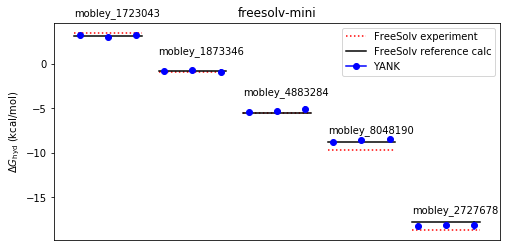

In [5]:
energy_units = unit.kilocalories_per_mole
fig = plt.figure(figsize=[8,4]);
colors = sns.color_palette("hls", nreplicates)
for entry_index, entry in enumerate(freesolv):
    h_exp = plt.plot(np.array([entry_index*nreplicates - 0.2, (entry_index+1)*nreplicates - 0.8]), np.array([1, 1])*entry['dg_exp'] / energy_units, 'r:')
    h_calc = plt.plot(np.array([entry_index*nreplicates - 0.2, (entry_index+1)*nreplicates - 0.8]), np.array([1, 1])*entry['dg_calc'] / energy_units, 'k-')
    plt.text(entry_index * nreplicates - 0.2, entry['dg_exp'] / energy_units + 2.0, entry['id'])
    for replicate in range(nreplicates):
        h_yank = plt.errorbar(entry_index*nreplicates + replicate, entry['dg_yank'][replicate] / energy_units, 2 * entry['dg_yank_error'][replicate] / energy_units, marker='o', markersize=6, color='b')
plt.xticks([]);
plt.ylabel('$\Delta G_\mathrm{hyd}$ (kcal/mol)')
plt.legend([h_exp[0], h_calc[0], h_yank[0]], ['FreeSolv experiment', 'FreeSolv reference calc', 'YANK']);
plt.title('freesolv-mini');